# Week 8: $k$-means

Goals: 
- learn about `reduce`
- introduction to $k$-means
- image compression with $k$-means

## `reduce`

Let's look at another function called `reduce`. This is an incredibly useful function. It looks like it is similar to `map` and `filter`, but it's fundamentally different.

`reduce` is part of `functools` a standard Python module, so you do not have to separately download it.

Let's import *just* `reduce` from `functools`.

In [1]:
from functools import reduce

By importing `reduce` this way, we do not have to interact with `functools`. We can run 
```python
reduce(...)
```

instead of 
```python
functools.reduce(...)
```

### So what does `reduce` do?

**Input:** a function `f` taking 2 inputs, an iterable object `L` (e.g. a list or ndarray), optional: initial value `v0` (default : `0`)

**Output:** a value of the same type as the initial value 

`reduce` applies the function `f` on the list `L` iteratively. 

---

For example:

`v0` given (or `0`)

`v1` = `f(v0, L[0])`

`v2` = `f(v1, L[1])`

...

`vN+1` = `f(vN, L[N])`

In [2]:
L = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
f = lambda x, y: x + y
reduce(f, L, 0)

55

In [3]:
# Same list as above
g = lambda x, y: x + "\t{}\n".format(y)     # Adds a tab, then ends the line
s = reduce(g, L, "Contents of L:\n")
print(s)

Contents of L:
	1
	2
	3
	4
	5
	6
	7
	8
	9
	10



Remember we used `sum(L)`? This is just a wrapper for essentially `reduce(lambda x, y: x + y, L)`. 

## Introducing $k$-means

Let's load the `digits` data set in `ski-kit learn` (also known as `sklearn`). This is a data set of hand written digits. 

The goal is group all of the digits into their own clusters. 

![](graphics/skl_digits_samp.png)

We will follow the [$k$-means tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) by `sklearn` (available with the [BSD license](https://opensource.org/license/bsd-3-clause/)). They go into much more detail, so check it out if you want to learn more! 

In [4]:
import numpy as np

from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features) = data.shape
n_digits = np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features: {n_features}")

# digits: 10; # samples: 1797; # features: 64


We have all ten digits represented in our data set. 

The number of data points (i.e. image data) is 1,797. 

Each data point lives in $\R^{64}$.

There's no way to visualise, so we do a PCA to get down to $2$ dimensions.

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)
print(reduce(g, kmeans.cluster_centers_, "Cluster centers:\n")) 

Cluster centers:
	[-22.24127778   3.239493  ]
	[ 3.73078975 -7.80662947]
	[ -3.58131057 -17.19922703]
	[-14.63261034  11.43601326]
	[15.92799064 13.04600235]
	[22.56835891 -0.08793854]
	[-13.25782591  -7.52282808]
	[ 1.4319417 21.5638794]
	[-4.13407071  1.49588825]
	[  9.54672467 -18.83373172]



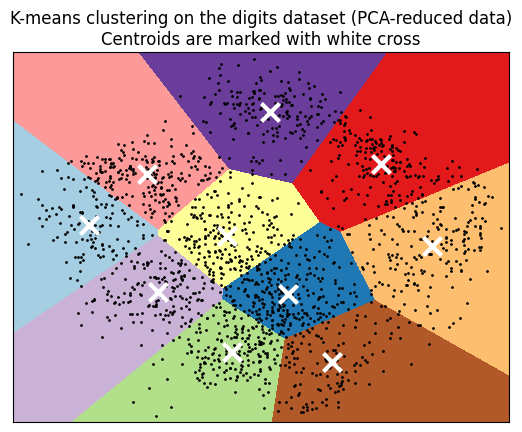

In [6]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Let's remove all the data points and look at what's left.

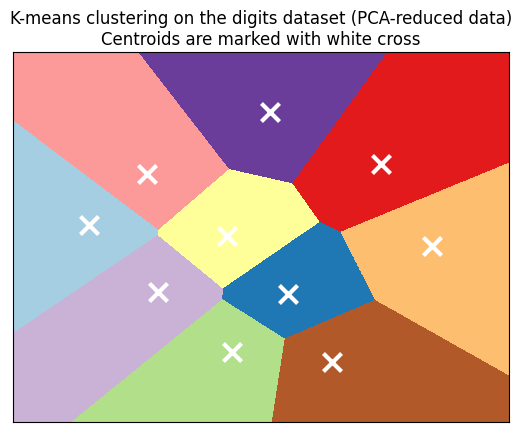

In [7]:
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

This is a tesselation of $\mathbb{R}^2$ into Voronoi cells. 

![](graphics/Voronoi_growth_euclidean.gif)

$k$-means clusters the data by tesselating the plane into Voronoi cells. That is, clusters are as good as Voronoi cells. 

## Image compression

We will use the `Pillow` package to work with images. (I think this gets installed if you've installed all the other packages so far.)

AxesImage(shape=(1030, 850, 3))


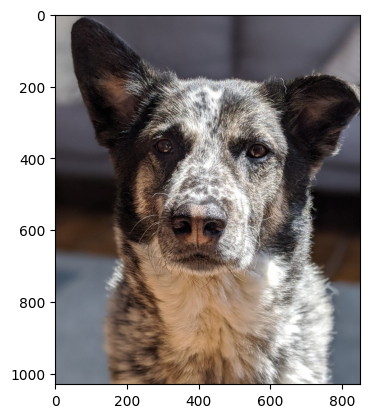

In [8]:
from PIL import Image

img = Image.open("data/Sherlock.jpg")
print(plt.imshow(img))

In [9]:
aimg = np.asarray(img)/255
acolor = aimg.reshape(aimg.shape[0]*aimg.shape[1], aimg.shape[2])
print("Shape of the image: {0}".format(aimg.shape))
print("Shape of flattened array: {0}".format(acolor.shape))

Shape of the image: (1030, 850, 3)
Shape of flattened array: (875500, 3)


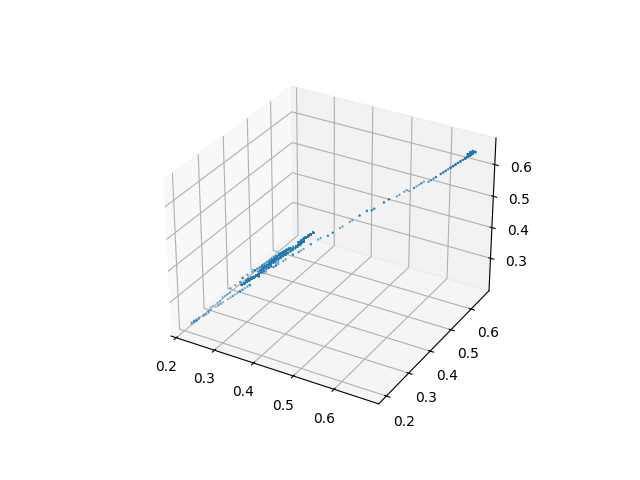

No such comm: 53bba45903eb4e82804a85e449943c61


In [10]:
%matplotlib ipympl
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
S = set([np.random.randint(0, aimg.shape[0]) for _ in range(10000)])
xs, ys, zs = np.array([acolor[s,:] for s in S]).T
ax.scatter3D(xs, ys, zs, s=0.5)

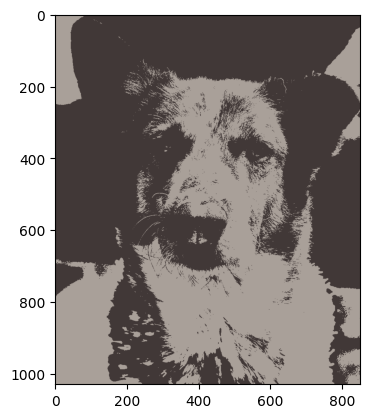

In [19]:
%matplotlib inline
plt.figure().clear()
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(acolor)
means = [list(map(lambda x: x, pt)) for pt in kmeans.cluster_centers_]
result = np.asarray(list(map(lambda i: means[i], kmeans.labels_)))
aimg_new = result.reshape(aimg.shape[0], aimg.shape[1], aimg.shape[2])
img_2 = Image.fromarray((aimg_new * 255).astype(np.uint8))
plt.imshow(img_2)